In [16]:
import tensorflow as tf

w = tf.Variable(2.)
def f(w):
  y = w**2
  z = 2*y + 5
  return z


with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)
# 2w**2+b

#가설 함수
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
  return w*x+b

x_test = [3.5, 5, 5.5, 6]

print(hypothesis(x_test).numpy())

#손실 함수
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

optimizer = tf.optimizers.SGD(0.01)



[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]
[15. 21. 23. 25.]


2022-06-26 18:15:00.573452: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [17]:
for i in range(301):
  
  with tf.GradientTape() as tape:
    y_pred = hypothesis(x)
    cost = mse_loss(y_pred, y)
    # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w,b])
    
  optimizer.apply_gradients(zip(gradients, [w,b]))
  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [18]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

model.add(Dense(1, input_dim=1, activation="linear"))
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse']) #평균제곱

model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 92ms/step - loss: 4180.9678 - mse: 4180.9678
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 515.5402 - mse: 515.5402
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 64.5354 - mse: 64.5354
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 9.0413 - mse: 9.0413
Epoch 5/300
1/1 [==============================] - 0s 1ms/step - loss: 2.2117 - mse: 2.2117
Epoch 6/300
1/1 [==============================] - 0s 1ms/step - loss: 1.3700 - mse: 1.3700
Epoch 7/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2651 - mse: 1.2651
Epoch 8/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2508 - mse: 1.2508
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2477 - mse: 1.2477
Epoch 10/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2459 - mse: 1.2459
Epoch 11/300
1/1 [==============================] - 0s 1ms/step - 

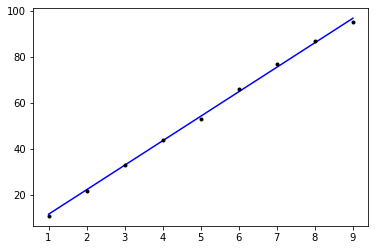

In [20]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
plt.show()

In [21]:
print(model.predict([9.3]))

[[100.024925]]


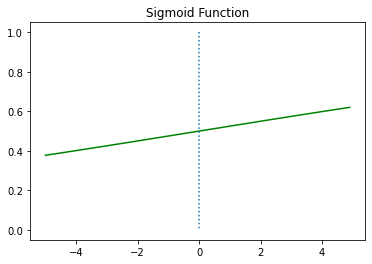

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(0.1* x)
plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


In [23]:
x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 113ms/step - loss: 3.9059 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2946 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2551 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2397 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2308 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2248 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 993us/step - loss: 0.2205 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2172 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2146 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 2ms/s

/Users/junyoung/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 41/200
1/1 [==============================] - 0s 893us/step - loss: 0.1960 - binary_accuracy: 0.9231
Epoch 42/200
1/1 [==============================] - 0s 904us/step - loss: 0.1958 - binary_accuracy: 0.9231
Epoch 43/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1957 - binary_accuracy: 0.9231
Epoch 44/200
1/1 [==============================] - 0s 899us/step - loss: 0.1955 - binary_accuracy: 0.9231
Epoch 45/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1953 - binary_accuracy: 0.9231
Epoch 46/200
1/1 [==============================] - 0s 808us/step - loss: 0.1952 - binary_accuracy: 0.9231
Epoch 47/200
1/1 [==============================] - 0s 832us/step - loss: 0.1950 - binary_accuracy: 0.9231
Epoch 48/200
1/1 [==============================] - 0s 904us/step - loss: 0.1948 - binary_accuracy: 0.9231
Epoch 49/200
1/1 [==============================] - 0s 736us/step - loss: 0.1947 - binary_accuracy: 0.9231
Epoch 50/200
1/1 [=======================

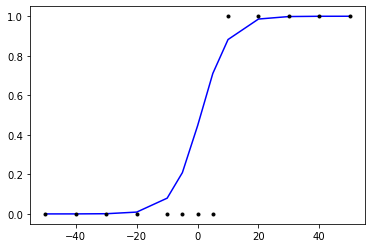

In [25]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [26]:
print(model.predict([1, 2, 3, 4, 4.5]))

[[0.50159055]
 [0.55708236]
 [0.6111851 ]
 [0.6626807 ]
 [0.68713236]]


In [33]:
print(model.predict([11, 21, 31, 41, 90]))

[[0.90343887]
 [0.988634  ]
 [0.9987649 ]
 [0.99986696]
 [1.        ]]


In [34]:
#다중입력 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

# x가 세개  차원이 세개
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))


sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 76ms/step - loss: 3039.8672 - mse: 3039.8672
Epoch 2/2000
1/1 [==============================] - 0s 926us/step - loss: 1655.9846 - mse: 1655.9846
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 913.0916 - mse: 913.0916
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 512.5495 - mse: 512.5495
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 295.4359 - mse: 295.4359
Epoch 6/2000
1/1 [==============================] - 0s 1ms/step - loss: 176.9843 - mse: 176.9843
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 111.8511 - mse: 111.8511
Epoch 8/2000
1/1 [==============================] - 0s 1ms/step - loss: 75.6959 - mse: 75.6959
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 55.3958 - mse: 55.3958
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 43.8397 - mse: 43.8397
Epoch 11/2000
1/1 [=========

/Users/junyoung/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 35/2000
1/1 [==============================] - 0s 2ms/step - loss: 23.6284 - mse: 23.6284
Epoch 36/2000
1/1 [==============================] - 0s 2ms/step - loss: 23.4705 - mse: 23.4705
Epoch 37/2000
1/1 [==============================] - 0s 9ms/step - loss: 23.3136 - mse: 23.3136
Epoch 38/2000
1/1 [==============================] - 0s 15ms/step - loss: 23.1579 - mse: 23.1579
Epoch 39/2000
1/1 [==============================] - 0s 7ms/step - loss: 23.0032 - mse: 23.0032
Epoch 40/2000
1/1 [==============================] - 0s 2ms/step - loss: 22.8495 - mse: 22.8495
Epoch 41/2000
1/1 [==============================] - 0s 11ms/step - loss: 22.6969 - mse: 22.6969
Epoch 42/2000
1/1 [==============================] - 0s 3ms/step - loss: 22.5452 - mse: 22.5452
Epoch 43/2000
1/1 [==============================] - 0s 2ms/step - loss: 22.3947 - mse: 22.3947
Epoch 44/2000
1/1 [==============================] - 0s 3ms/step - loss: 22.2451 - mse: 22.2451
Epoch 45/2000
1/1 [===================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 3ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1542/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1543/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1544/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1545/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1546/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1547/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1548/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1549/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137
Epoch 1550/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137 - mse: 0.0137
Epoch 1551/2000
1/1 [==============================] - 0

In [38]:
print(model.predict(X))

[[72.93743 ]
 [81.97445 ]
 [72.09063 ]
 [57.115433]
 [33.804916]]


In [37]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

[[57.91269 ]
 [56.052547]]


In [39]:
#다중 로지스틱

X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

print(model.predict(X))

Epoch 1/2000
1/1 [==============================] - 0s 95ms/step - loss: 0.6374 - binary_accuracy: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6365 - binary_accuracy: 0.6667
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6356 - binary_accuracy: 0.6667
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6347 - binary_accuracy: 0.6667
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6338 - binary_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 932us/step - loss: 0.6329 - binary_accuracy: 0.6667
Epoch 7/2000
1/1 [==============================] - 0s 998us/step - loss: 0.6320 - binary_accuracy: 0.6667
Epoch 8/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6311 - binary_accuracy: 0.6667
Epoch 9/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6302 - binary_accuracy: 0.6667
Epoch 10/2000
1/1 [==============================]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1583/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3489 - binary_accuracy: 1.0000
Epoch 1584/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3488 - binary_accuracy: 1.0000
Epoch 1585/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3488 - binary_accuracy: 1.0000
Epoch 1586/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3487 - binary_accuracy: 1.0000
Epoch 1587/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3486 - binary_accuracy: 1.0000
Epoch 1588/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3486 - binary_accuracy: 1.0000
Epoch 1589/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3485 - binary_accuracy: 1.0000
Epoch 1590/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3484 - binary_accuracy: 1.0000
Epoch 1591/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3484 - binary_accuracy: 1.0000
Epoch 1592/2000
1/1 [=======

In [40]:
#벡터 행렬
import numpy as np
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [41]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


In [42]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]
